# Market Analyst Agent - Notebook

This notebook is for running and testing individual agents before wiring them into the API.

In [1]:
# Load env vars from .env
import os
from pathlib import Path
from dotenv import load_dotenv

root = Path.cwd().parent if (Path.cwd() / 'backend').exists() is False else Path.cwd()
load_dotenv(root / '.env')

# Optional: sanity check for required envs
required = [
    'AZURE_OPENAI_ENDPOINT',
    'AZURE_OPENAI_API_KEY',
    'AZURE_OPENAI_DEPLOYMENT',
    'TAVILY_API_KEY',
]
missing = [k for k in required if not os.getenv(k)]
if missing:
    print('Missing env vars:', missing)
else:
    print('All required env vars present')


All required env vars present


In [2]:
# Import and build the web search agent
import sys
from pathlib import Path
from langchain.messages import HumanMessage

root = Path.cwd().parent if (Path.cwd() / 'backend').exists() is False else Path.cwd()
sys.path.append(str(root / 'backend'))

from app.agents.news.web_search_agent import build_web_search_agent

agent = build_web_search_agent()
print('Agent ready')


Agent ready


c:\Users\rushi\OneDrive - ImmersiLearn Education Services LLP\Projects\LLM Projects\market-analyst-agent\backend\app\agents\news\web_search_agent.py:46: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the `langchain-tavily package and should be used instead. To use it run `pip install -U `langchain-tavily` and import as `from `langchain_tavily import TavilySearch``.
  TavilySearchResults(max_results=5),


In [5]:
# Run a query
query = 'latest quarterly earnings for NVIDIA'
result = agent.invoke({'messages': [HumanMessage(content=query)]})
result


{'messages': [HumanMessage(content='latest quarterly earnings for NVIDIA', additional_kwargs={}, response_metadata={}, id='e7bb13c8-1768-4a67-9edf-6b1407020feb'),
  AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 39, 'prompt_tokens': 191, 'total_tokens': 230, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5.2-2025-12-11', 'system_fingerprint': None, 'id': 'chatcmpl-DBZ5cTnlmanArd3k5zoKegI2rn1xy', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 'detected': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'sa

## Technical Analysis Agent


In [3]:
# Import and run technical chart agent
from app.agents.technical.technical_chart_agent import analyze_stock_technical

result = analyze_stock_technical('AAPL')
result


Failed to multipart ingest runs: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


TechnicalAnalysisResult(symbol='AAPL', image_path='data\\processed\\AAPL_technical.png', summary='- **Trend (price action):** After a December/early‑January decline into a mid‑January low (~245–250), AAPL staged a strong rebound into early February (~278–280) and has since **pulled back and moved sideways** around **~258–265**. Near-term structure looks like **consolidation after a sharp rally**.\n- **Momentum (MACD):** MACD turned up strongly in late January/early February (bullish momentum phase), but the histogram has been **shrinking** and the MACD/Signal lines are **flattening near/above zero**, indicating **waning upside momentum**.\n- **Notable crossovers:** A **bullish MACD crossover** occurred in late January (helped drive the rally). More recently, MACD is **close to a potential bearish crossover** (or already marginal), which would confirm **momentum rollover** if it continues.\n- **RSI (overbought/oversold):** RSI bottomed near **oversold (~30)** at the January low, then re

Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


In [6]:
print(result.summary)

- **Trend (price action):** After a December/early‑January decline into a mid‑January low (~245–250), AAPL staged a strong rebound into early February (~278–280) and has since **pulled back and moved sideways** around **~258–265**. Near-term structure looks like **consolidation after a sharp rally**.
- **Momentum (MACD):** MACD turned up strongly in late January/early February (bullish momentum phase), but the histogram has been **shrinking** and the MACD/Signal lines are **flattening near/above zero**, indicating **waning upside momentum**.
- **Notable crossovers:** A **bullish MACD crossover** occurred in late January (helped drive the rally). More recently, MACD is **close to a potential bearish crossover** (or already marginal), which would confirm **momentum rollover** if it continues.
- **RSI (overbought/oversold):** RSI bottomed near **oversold (~30)** at the January low, then recovered to the **mid/upper‑50s** during the rally. It has since eased back to around **~50**, suggest

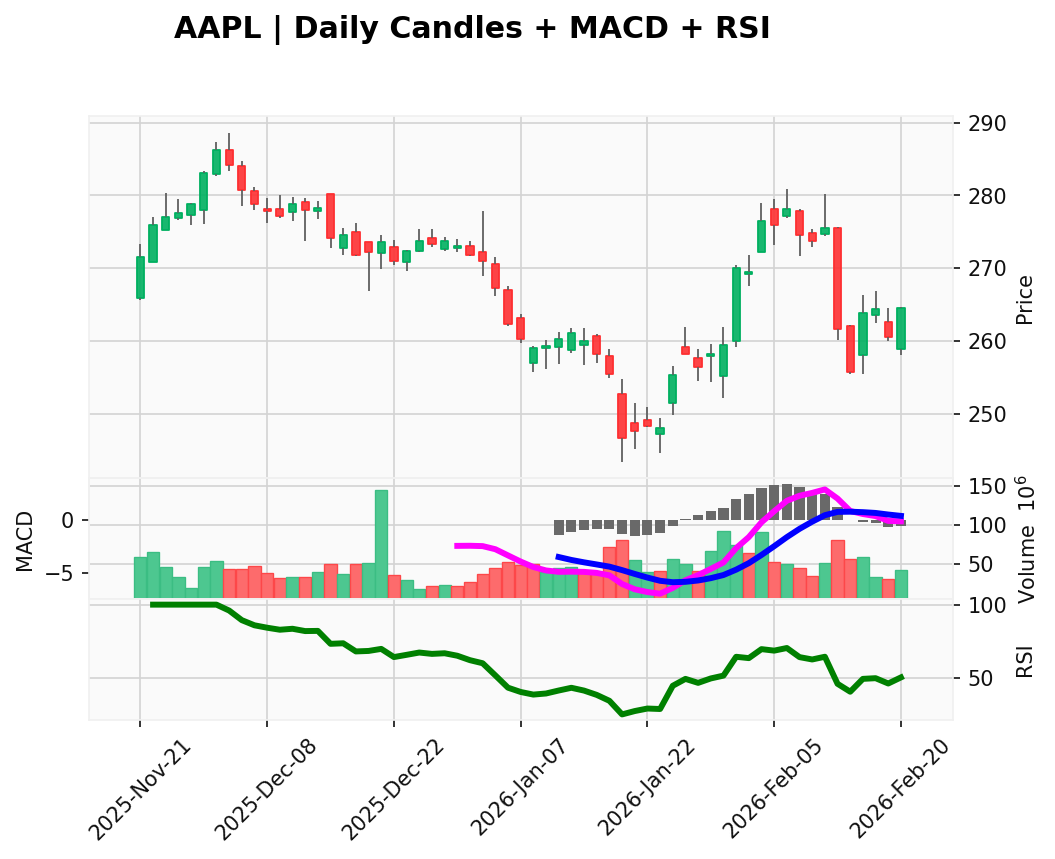

In [4]:
# Display chart image
from IPython.display import Image, display

display(Image(filename=result.image_path))
